In [2]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,osumidata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 24 fitted parameters, 16 of which have a bayesian prior
Total Residual:                        1115.7
Components of residual:
Concentration Trajectories (Figure 2): 455.1
Initial Reaction Rate (Figure 3A):     200.1
Mg2PPi solubility (Figure 3B):         221.0
Parameter priors:                      152.9
pH Effect Data:                        86.5


In [4]:
function drawprecipline!(plt,(Mg,PPi))
    PPioffset = PPi-0.5*Mg
    rangemin = 0.01+max(0,Mg-2*PPi)
    Mgrange = LinRange(rangemin,64,1000)
    plot!(plt,Mgrange,0.5 .* Mgrange .+ PPioffset,label = "")
    scatter!([Mg],[PPi],mc = :black,label = "")
end

drawprecipline! (generic function with 1 method)

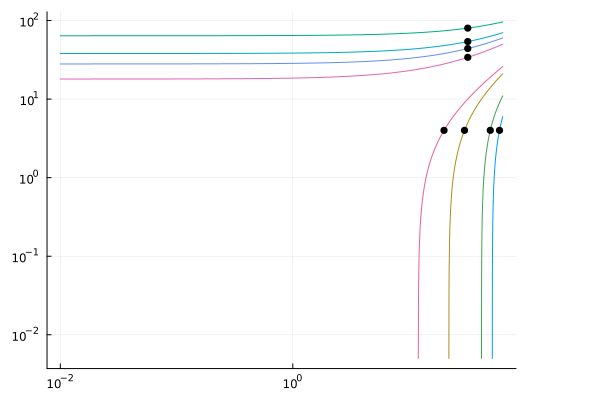

In [54]:
Mgrange1 = LinRange(0.1,20,1000)
Mgrange2 = LinRange(0.51,20,1000)
Mgrange3 = LinRange(1.01,20,1000)

phasediagram = plot(xscale = :log, yscale = :log)#plotMg2PPiphasediagram(fittingmodel,akamafittedparams, akamafittedcovariancematrix, time = 2400000)
#scatter!(Mg25,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")
#scatter!(Mg25 .+4,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")

#drawprecipline!(phasediagram,(120,6))
#drawprecipline!(phasediagram,(110,6))
#drawprecipline!(phasediagram,(90,4))
#drawprecipline!(phasediagram,(80,4))
drawprecipline!(phasediagram,(60,4))
drawprecipline!(phasediagram,(50,4))
drawprecipline!(phasediagram,(30,4))
drawprecipline!(phasediagram,(20,4))

drawprecipline!(phasediagram,(32,80))
drawprecipline!(phasediagram,(32,54))
drawprecipline!(phasediagram,(32,44))
drawprecipline!(phasediagram,(32,34))


plot!(legend = :outerright)
savefig(phasediagram,"../figures/ATPsolubilitySoroush/4mMATPpoints.png")
phasediagram

<b>4 mM ATP<b>

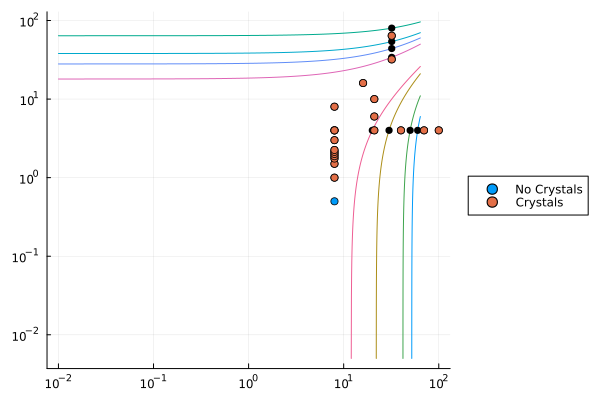

In [55]:
mgall = [8
8
8
8
8
8
8
8
8
8
8
8
21
21
21
40
70
100
16
32
32]

PPiall = [0.5
1
1.5
1.75
1.875
2
2.125
2.25
3
4
8
4
4
6
10
4
4
4
16
32
64]

mgC = [8
8
8
8
8
8
8
8
8
8
8
21
21
21
40
70
100
16
32
32]
ppiC = [1
1.5
1.75
1.875
2
2.125
2.25
3
4
8
4
4
6
10
4
4
4
16
32
64
]
scatter!(mgall,PPiall, label = "No Crystals")

scatter!(mgC,PPiC, label = "Crystals")


<b>20 mM ATP<b>

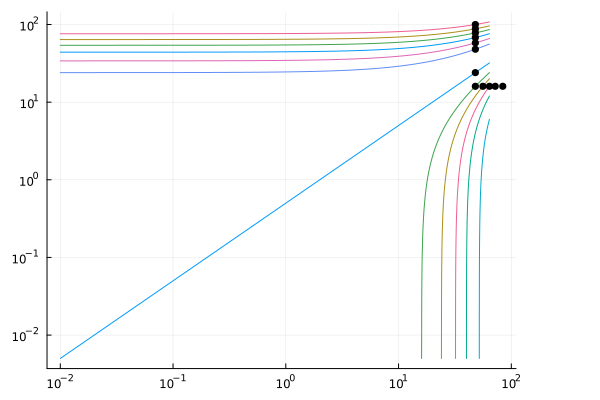

In [85]:
Mgrange1 = LinRange(0.1,20,1000)
Mgrange2 = LinRange(0.51,20,1000)
Mgrange3 = LinRange(1.01,20,1000)

phasediagram = plot(xscale = :log, yscale = :log)#plotMg2PPiphasediagram(fittingmodel,akamafittedparams, akamafittedcovariancematrix, time = 2400000)
#scatter!(Mg25,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")
#scatter!(Mg25 .+4,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")

drawprecipline!(phasediagram,(48,24))
drawprecipline!(phasediagram,(48,16))
drawprecipline!(phasediagram,(56,16))
drawprecipline!(phasediagram,(64,16))
drawprecipline!(phasediagram,(72,16))
drawprecipline!(phasediagram,(84,16))
#drawprecipline!(phasediagram,(100,16))

drawprecipline!(phasediagram,(48,48))
drawprecipline!(phasediagram,(48,58))
drawprecipline!(phasediagram,(48,68))
drawprecipline!(phasediagram,(48,78))
drawprecipline!(phasediagram,(48,88))
drawprecipline!(phasediagram,(48,100))


plot!(legend = :outerright)
savefig(phasediagram,"../figures/ATPsolubilitySoroush/4mMATPpoints.png")
phasediagram

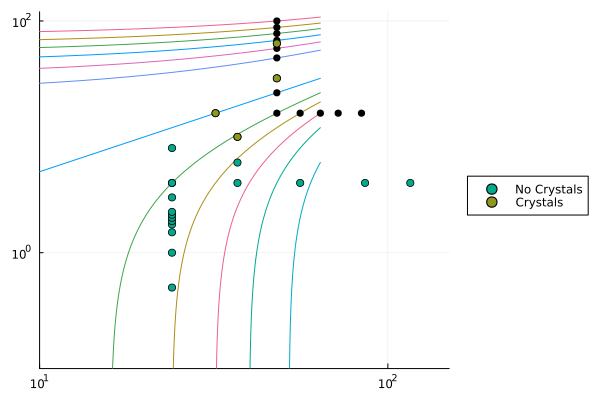

In [86]:
mgall = [24
24
24
24
24
24
24
24
24
24
24
24
37
37
37
56
86
116
32
48
48
]

PPiall = [0.5
1
1.5
1.75
1.875
2
2.125
2.25
3
4
8
4
4
6
10
4
4
4
16
32
64
]

mgC = [37
32
48
48]
ppiC = [10
16
32
64
]
scatter!(mgall,PPiall, label = "No Crystals")

scatter!(mgC,ppiC, label = "Crystals")
plot!(ylims = (0.1,120), xlims = (10,150))